In [5]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import pandas as pd
import numpy as np
!pip install stackview
import stackview

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.6 MB/s eta 0:00:00



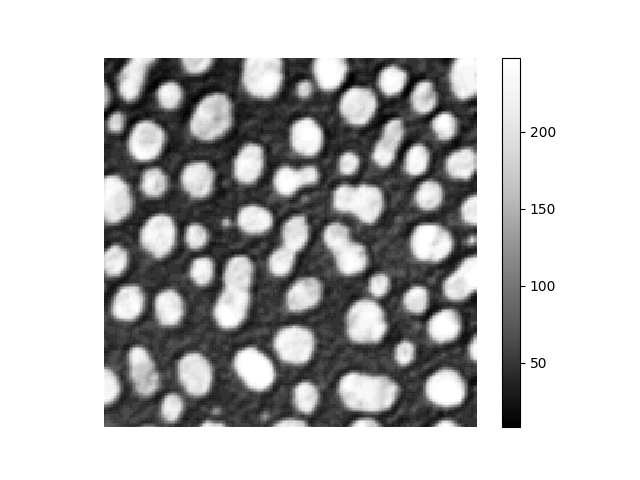
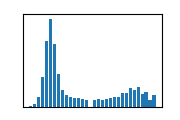


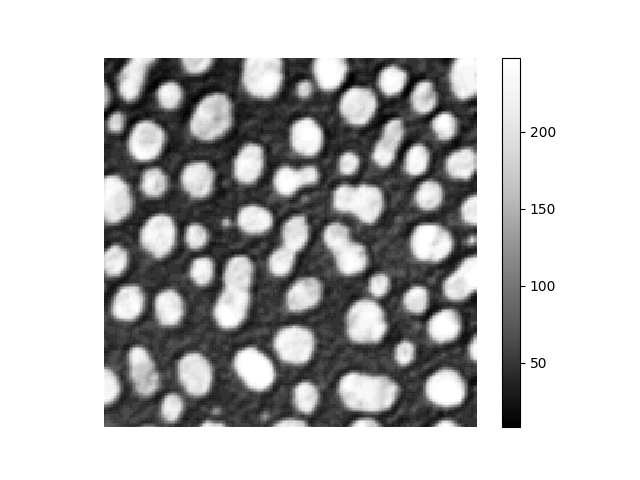
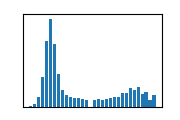

ndarray (254, 256) show data
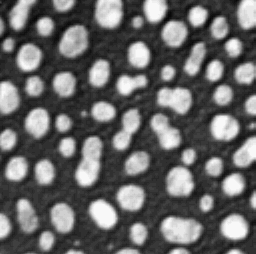

In [6]:
image = imread("https://samples.fiji.sc/blobs.png")[0]
stackview.insight(image)


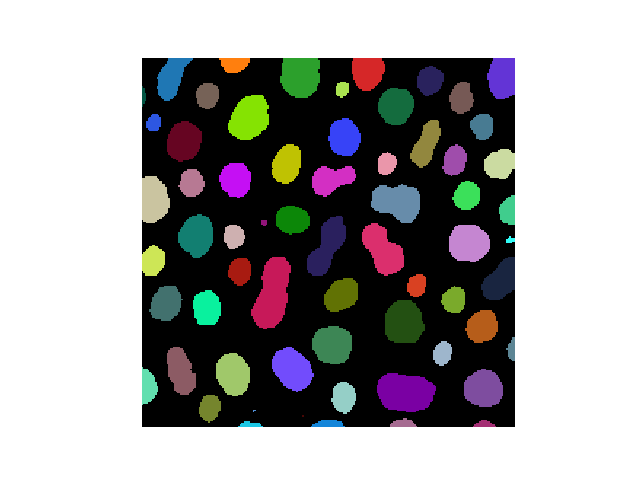

In [7]:
binary = image > threshold_otsu(image)
labels = label(binary)
stackview.insight(labels)

In [8]:
table = pd.DataFrame(regionprops_table(labels,
                                      intensity_image=image,
                                      properties=("area",
                                                  "perimeter",
                                                  "mean_intensity",
                                                  "minor_axis_length",
                                                  "major_axis_length")))
table


,area,perimeter,mean_intensity,minor_axis_length,major_axis_length
0,433.0,91.254834,190.854503,16.819060,34.957399
1,185.0,53.556349,179.286486,11.803854,21.061417
2,658.0,95.698485,205.617021,28.278264,30.212552
3,434.0,76.870058,217.327189,23.064079,24.535398
4,477.0,83.798990,212.142558,19.833058,31.162612
...,...,...,...,...,...
59,1.0,0.000000,128.000000,0.000000,0.000000
60,81.0,40.727922,183.407407,5.920690,18.558405
61,90.0,46.278175,181.511111,5.369081,22.458271
62,53.0,31.899495,188.377358,5.065719,14.811463


In [9]:
np.median(table["mean_intensity"])

np.float64(189.74869610874512)

In [10]:
table.describe()

,area,perimeter,mean_intensity,minor_axis_length,major_axis_length
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,347.546875,66.432384,187.727254,16.593760,24.195781
std,217.766289,27.050533,19.041565,7.089551,9.916696
min,1.000000,0.000000,128.000000,0.000000,0.000000
25%,182.500000,51.177670,181.168929,12.791457,18.505240
50%,355.500000,68.698485,189.748696,17.349200,23.649826
75%,502.250000,86.244426,199.147523,21.743873,30.219915
max,902.000000,130.568542,219.915171,28.278264,54.785426


In [12]:
corr = table.corr()
def colorize(styler):
  styler.background_gradient(axis=None, cmap="seismic")
  return styler
corr.style.pipe(colorize)

,area,perimeter,mean_intensity,minor_axis_length,major_axis_length
area,1.000000,0.961579,0.622818,0.898116,0.894802
perimeter,0.961579,1.000000,0.707842,0.873781,0.962880
mean_intensity,0.622818,0.707842,1.000000,0.743692,0.617727
minor_axis_length,0.898116,0.873781,0.743692,1.000000,0.713343
major_axis_length,0.894802,0.962880,0.617727,0.713343,1.000000
